In [1]:
# Import Libraries and datasets
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from wordcloud import WordCloud
import string
import nltk

In [2]:
reviews = pd.read_csv("C:/Users/HYACINTH OSEJI/Downloads/amazon_reviews.csv")
reviews.head()

,rating,date,variation,verified_reviews,feedback
0,5,31-Jul-18,Charcoal Fabric,Love my Echo!,1
1,5,31-Jul-18,Charcoal Fabric,Loved it!,1
2,4,31-Jul-18,Walnut Finish,"Sometimes while playing a game, you can answer...",1
3,5,31-Jul-18,Charcoal Fabric,I have had a lot of fun with this thing. My 4 ...,1
4,5,31-Jul-18,Charcoal Fabric,Music,1


In [3]:
# Dataframe info
reviews.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3150 entries, 0 to 3149
Data columns (total 5 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   rating            3150 non-null   int64 
 1   date              3150 non-null   object
 2   variation         3150 non-null   object
 3   verified_reviews  3149 non-null   object
 4   feedback          3150 non-null   int64 
dtypes: int64(2), object(3)
memory usage: 123.2+ KB


In [4]:
# Dataframe statistical summary
reviews.describe()

,rating,feedback
count,3150.000000,3150.000000
mean,4.463175,0.918413
std,1.068506,0.273778
min,1.000000,0.000000
25%,4.000000,1.000000
50%,5.000000,1.000000
75%,5.000000,1.000000
max,5.000000,1.000000


In [5]:
# Drop the date column
reviews = reviews.drop(['date'], axis = 1)
# reviews.head()

<Axes: >

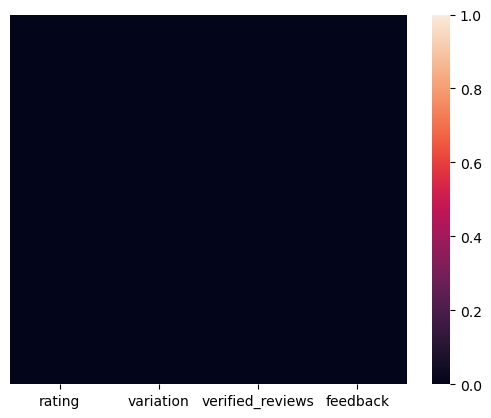

In [6]:
# DATA VISUALIZATION
# Check for null values
sns.heatmap(reviews.isnull(), yticklabels = False) #no null values found

<Axes: xlabel='rating', ylabel='count'>

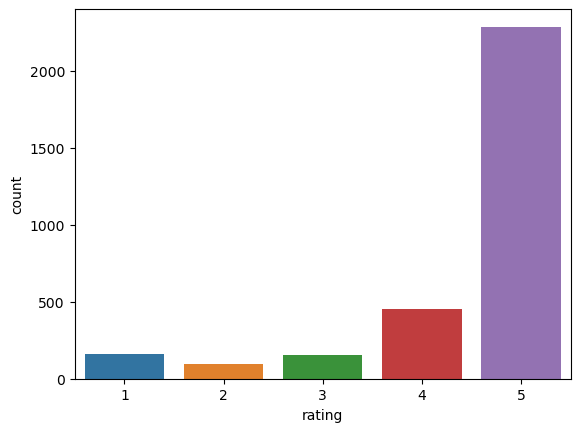

In [7]:
# Count plot for each rating
sns.countplot(x = reviews['rating'])

In [8]:
# DATA EXPLORATION

# get length of each verified review 
reviews['verified_reviews'] = reviews['verified_reviews'].fillna('')
reviews['length'] = reviews['verified_reviews'].apply(len)
#reviews.head()

<Axes: ylabel='Frequency'>

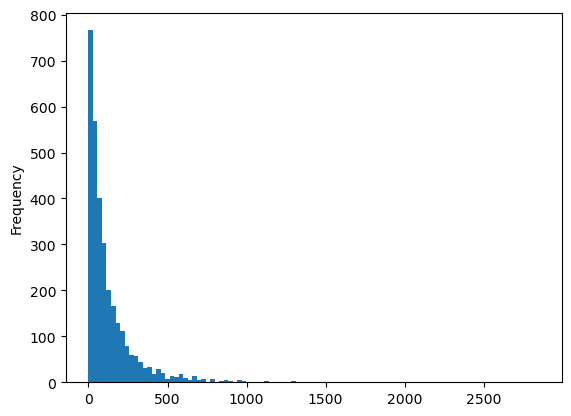

In [9]:
# Plot histogram for new column
reviews['length'].plot(bins=100, kind='hist') # Lost of short reviews

In [10]:
# Longest review
reviews[reviews['length'] == max(reviews['length'])]['verified_reviews'].iloc[0]

"Incredible piece of technology.I have this right center of my living room on an island kitchen counter. The mic and speaker goes in every direction and the quality of the sound is quite good. I connected the Echo via Bluetooth to my Sony soundbar on my TV but find the Echo placement and 360 sound more appealing. It's no audiophile equipment but there is good range and decent bass. The sound is more than adequate for any indoor entertaining and loud enough to bother neighbors in my building. The knob on the top works great for adjusting volume. This is my first Echo device and I would imagine having to press volume buttons (on the Echo 2) a large inconvenience and not as precise. For that alone I would recommend this over the regular Echo (2nd generation).The piece looks quality and is quite sturdy with some weight on it. The rubber material on the bottom has a good grip on the granite counter-- my cat can even rub her scent on it without tipping it over.This order came with a free Phi

In [11]:
# PLOT THE WORD CLOUD

# Obtain positive and negative reviews
positive = reviews[reviews['feedback'] == 1]
negative = reviews[reviews['feedback'] == 0]

# convert positve to list format
sentences = positive['verified_reviews'].tolist()
len(sentences)

2893

In [12]:
# Join all positive reviews to large string
sentences_combined = ' '.join(sentences)
sentences_combined

'Love my Echo! Loved it! Sometimes while playing a game, you can answer a question correctly but Alexa says you got it wrong and answers the same as you.  I like being able to turn lights on and off while away from home. I have had a lot of fun with this thing. My 4 yr old learns about dinosaurs, i control the lights and play games like categories. Has nice sound when playing music as well. Music I received the echo as a gift. I needed another Bluetooth or something to play music easily accessible, and found this smart speaker. Can’t wait to see what else it can do. Without having a cellphone, I cannot use many of her features. I have an iPad but do not see that of any use.  It IS a great alarm.  If u r almost deaf, you can hear her alarm in the bedroom from out in the living room, so that is reason enough to keep her.It is fun to ask random questions to hear her response.  She does not seem to be very smartbon politics yet. I think this is the 5th one I\'ve purchased. I\'m working on 

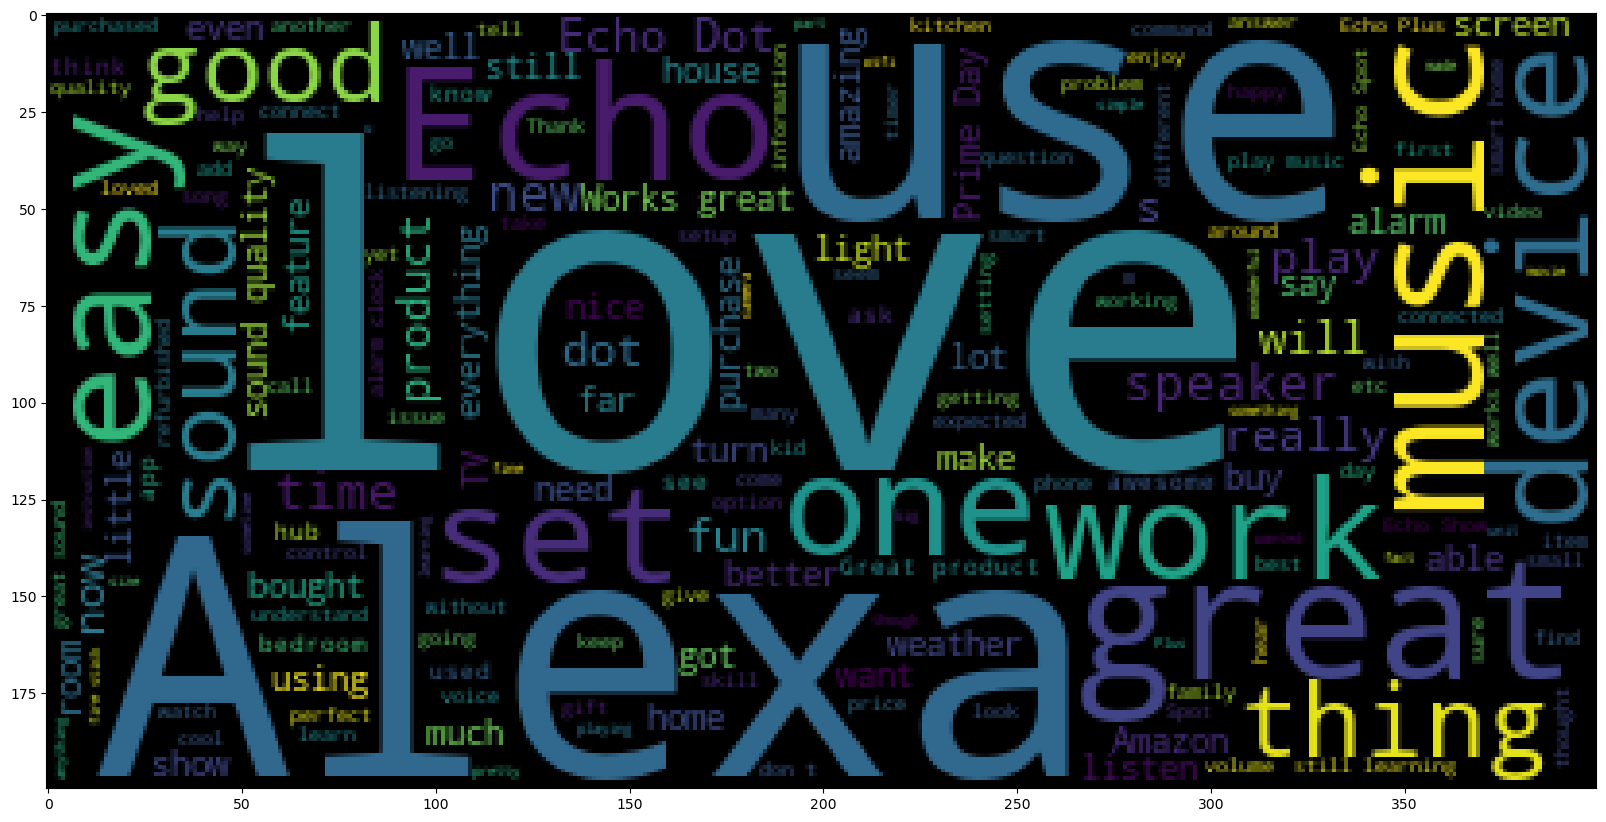

In [13]:
# Create World cloud
plt.figure(figsize=(20,20))
plt.imshow(WordCloud().generate(sentences_combined))

In [14]:
# TEXT DATA CLEANING
string.punctuation

'!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'

In [15]:
# testing removing punctuations
Test = 'I love football ... {{}'
Test_punc_removed = [char  for char in Test if char not in string.punctuation]
Test_punc_removed

['I',
 ' ',
 'l',
 'o',
 'v',
 'e',
 ' ',
 'f',
 'o',
 'o',
 't',
 'b',
 'a',
 'l',
 'l',
 ' ',
 ' ']

In [16]:
# Join characters to form one string
Test_punc_removed_join = ''.join(Test_punc_removed)
Test_punc_removed_join

'I love football  '

In [17]:
# View english stopwords
from nltk.corpus import stopwords
nltk.download('stopwords')
stopwords.words('english')

[nltk_data] Downloading package stopwords to C:\Users\HYACINTH
[nltk_data]     OSEJI\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


['i',
 'me',
 'my',
 'myself',
 'we',
 'our',
 'ours',
 'ourselves',
 'you',
 "you're",
 "you've",
 "you'll",
 "you'd",
 'your',
 'yours',
 'yourself',
 'yourselves',
 'he',
 'him',
 'his',
 'himself',
 'she',
 "she's",
 'her',
 'hers',
 'herself',
 'it',
 "it's",
 'its',
 'itself',
 'they',
 'them',
 'their',
 'theirs',
 'themselves',
 'what',
 'which',
 'who',
 'whom',
 'this',
 'that',
 "that'll",
 'these',
 'those',
 'am',
 'is',
 'are',
 'was',
 'were',
 'be',
 'been',
 'being',
 'have',
 'has',
 'had',
 'having',
 'do',
 'does',
 'did',
 'doing',
 'a',
 'an',
 'the',
 'and',
 'but',
 'if',
 'or',
 'because',
 'as',
 'until',
 'while',
 'of',
 'at',
 'by',
 'for',
 'with',
 'about',
 'against',
 'between',
 'into',
 'through',
 'during',
 'before',
 'after',
 'above',
 'below',
 'to',
 'from',
 'up',
 'down',
 'in',
 'out',
 'on',
 'off',
 'over',
 'under',
 'again',
 'further',
 'then',
 'once',
 'here',
 'there',
 'when',
 'where',
 'why',
 'how',
 'all',
 'any',
 'both',
 'each

In [18]:
# Remove stopwords
Test_punc_removed_join_clean = [word for word in Test_punc_removed_join.split() if word.lower() not in stopwords.words('english')]
Test_punc_removed_join_clean

['love', 'football']

In [19]:
# Create pipeline to remove punctuations, stopwords and perform count vectorization

def cleaning(message):
    Test_punc_removed = [char for char in message if char not in string.punctuation ]
    Test_punc_removed_join = ''.join(Test_punc_removed)
    Test_punc_removed_join_clean = [word for word in Test_punc_removed_join.split() if word.lower() not in stopwords.words('english')]
    return Test_punc_removed_join_clean

In [20]:
reviews_clean = reviews['verified_reviews'].apply(cleaning)

In [21]:
# Original review
print(reviews['verified_reviews'][5]) 

I received the echo as a gift. I needed another Bluetooth or something to play music easily accessible, and found this smart speaker. Can’t wait to see what else it can do.


In [22]:
# Cleaned up review
print(reviews_clean[5])

['received', 'echo', 'gift', 'needed', 'another', 'Bluetooth', 'something', 'play', 'music', 'easily', 'accessible', 'found', 'smart', 'speaker', 'Can’t', 'wait', 'see', 'else']


In [23]:
from sklearn.feature_extraction.text import CountVectorizer
# Define the cleaning pipeline earlier
vectorizer = CountVectorizer(analyzer = cleaning)
reviews_countvectorizer = vectorizer.fit_transform(reviews['verified_reviews'])

In [24]:
reviews_countvectorizer.shape
reviews_df = pd.DataFrame(reviews_countvectorizer.toarray())
X = reviews_df
X

,0,1,2,3,4,5,6,7,8,9,...,5201,5202,5203,5204,5205,5206,5207,5208,5209,5210
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3145,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3146,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3147,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3148,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [25]:
y = reviews['feedback']
y

0       1
1       1
2       1
3       1
4       1
       ..
3145    1
3146    1
3147    1
3148    1
3149    1
Name: feedback, Length: 3150, dtype: int64

In [26]:
# TRAIN AND TEST A NAIVES BAYES CLASSIFIER MODEL
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [27]:
from sklearn.naive_bayes import MultinomialNB
NB = MultinomialNB()
NB.fit(X_train, y_train)

MultinomialNB()

array([[ 19,  29],
       [ 11, 571]], dtype=int64)

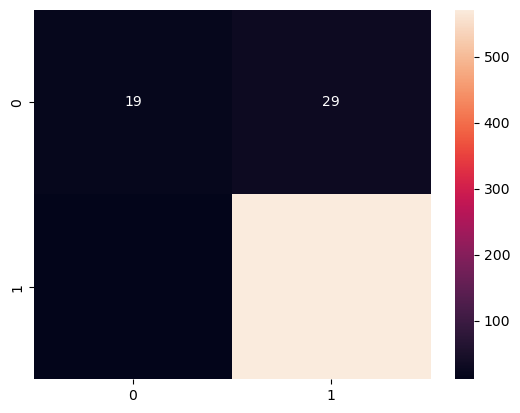

In [28]:
# Plot confusion matrix
from sklearn.metrics import classification_report, confusion_matrix
y_predict_test = NB.predict(X_test)
Matrix = confusion_matrix(y_test, y_predict_test)
sns.heatmap(Matrix, annot=True)
Matrix

In [29]:
# Print classification report
print(classification_report(y_test, y_predict_test))

              precision    recall  f1-score   support

           0       0.63      0.40      0.49        48
           1       0.95      0.98      0.97       582

    accuracy                           0.94       630
   macro avg       0.79      0.69      0.73       630
weighted avg       0.93      0.94      0.93       630



              precision    recall  f1-score   support

           0       0.68      0.27      0.39        48
           1       0.94      0.99      0.97       582

    accuracy                           0.93       630
   macro avg       0.81      0.63      0.68       630
weighted avg       0.92      0.93      0.92       630



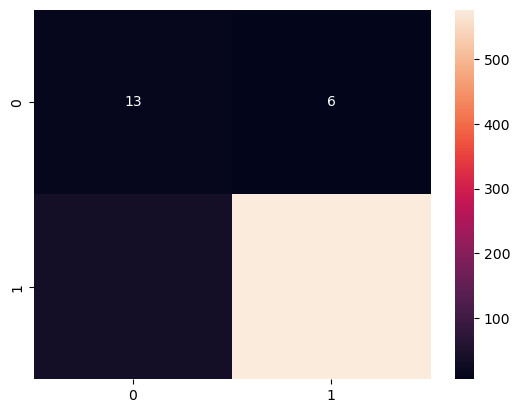

In [33]:
# Train a logistic regression classifier
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

cm = confusion_matrix(y_pred, y_test)
sns.heatmap(cm, annot = True)
print(classification_report(y_test, y_pred))